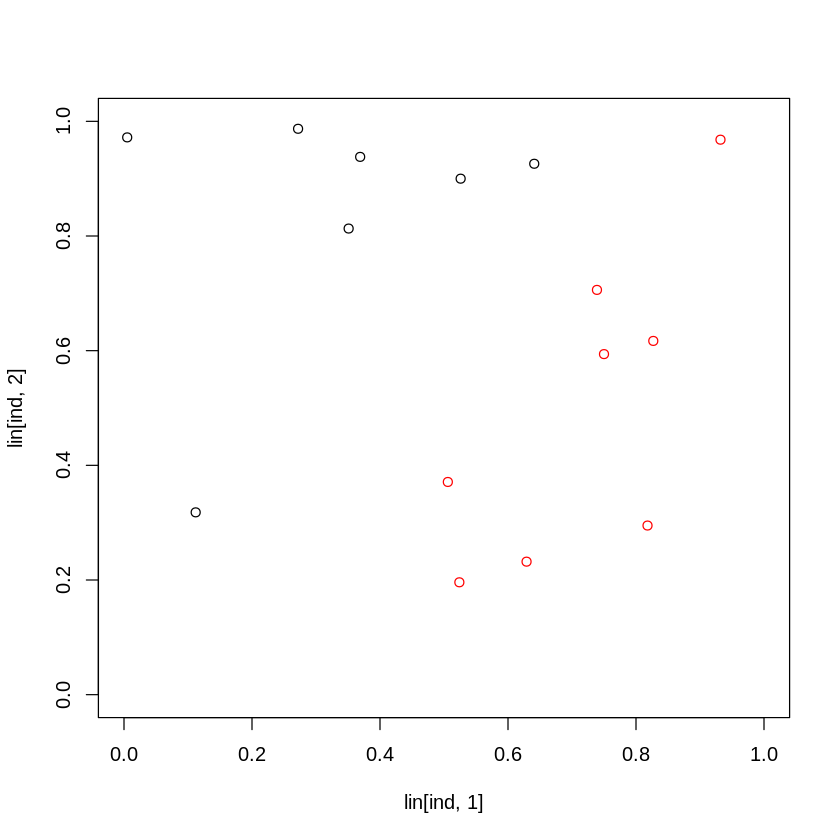

In [ ]:
##Datos
lin <- read.csv("lineal.csv",header = F)
ind=which(lin[,3]==0)
plot(lin[ind,1],lin[ind,2],type="p",xlim=c(0,1),ylim=c(0,1))
lines(lin[-ind,1],lin[-ind,2],type="p",col="red")
####
a <-as.matrix(lin[,-3])
x <- cbind(rep(1,nrow(a)),as.matrix(lin[,-3])) #predictores
y <-lin[,3] #predictando

Vamos a empezar probando una red sin capas ocultas, o sea una regresión sigmoide:

In [ ]:
##Definimos las funciones previamente que vamos a usar

#Función de activación
sigmoide <- function(z){
    1/(1 + exp(-z))
}

#Función de coste 
#error total
error.total <- function(p,phat){
    e <- 0
    for (i in 1:length(p)){
        e <- e + ((1/2) * (p[i] - phat[i])^2)
    }
    return((1/length(p)) * e)
}

#Derivada error con respecto a la sigmoide
der_error.total_sigmoide <- function(y,output){
    der_e = c()
    for (i in 1:length(y)){
        der_e = c(der_e, (y[i] - output[i]))
    }
    return((der_e))
}
#Derivada de la sigmoide con respecto a la regresión
der_sigmoide <- function(input){
    return((sigmoide(input) * (1 - sigmoide(input))))
}

#Derivada de la regresión con respecto al peso
der_reg_peso <- function(peso){
    return(peso)
}

El error de la predicción en la última época es:  0.004999932
La cantidad de épocas que han pasado han sido: 41326
La predicción es:

y,predicción
0,0.00313
1,0.86064
0,0.09661
1,0.84906
0,0.01355
1,0.96881
1,0.93872
0,0.00018
0,0.23730
1,0.96767


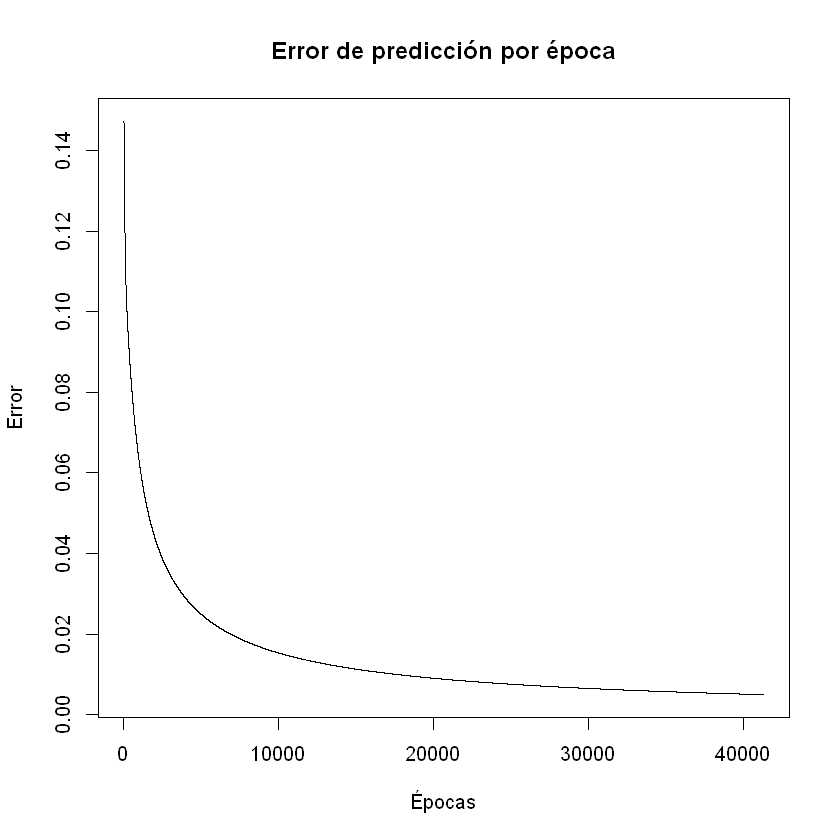

In [ ]:
learning_rate = 0.1
minimo = -1
maximo = 1
w <- runif(ncol(x),minimo,maximo)
input <- x %*% w
output <- sigmoide(input)
error_total <- error.total(y, output)
error_min = 0.005 #Establecemos un error minimo para el que pare la red 
error_total_epocas = c()

while (error_total >= error_min){
    input <- x %*% w
    output <- sigmoide(input)
    error_total <- error.total(y, output)
    error_total_epocas <- c(error_total_epocas, error_total)
    #Backpropagation
    dE_dout <- der_error.total_sigmoide(y, output)
    dout_din <- der_sigmoide(input)
    #Actualización de pesos
    desv_w0 <- dE_dout * dout_din * x[,1] * learning_rate
    desv_w1 <- dE_dout * dout_din * x[,2] * learning_rate
    desv_w2 <- dE_dout * dout_din * x[,3] * learning_rate
    
    w[1] <- w[1] + mean(desv_w0)
    w[2] <- w[2] + mean(desv_w1)
    w[3] <- w[3] + mean(desv_w2)
}
plot(error_total_epocas, xlab ='Épocas', ylab = 'Error', main = 'Error de predicción por época',type = 'l')
cat('El error de la predicción en la última época es: ', error_total)
cat('\nLa cantidad de épocas que han pasado han sido:',length(error_total_epocas))
cat('\nLa predicción es:')
result = matrix(c(y, round(output, digits = 5)), ncol = 2)
colnames(result) <- c('y', 'predicción')
result

Vista la red sin capas ocultas (es decir, una regresión logística), ahora vamos a incluirlas, tomando como error de referencia uno cercano al realizado en dicha regresión para valorar que sea una buena predicción: 0.004

In [ ]:
##Datos lineal
lin <- read.csv("lineal.csv",header = F)
ind=which(lin[,3]==0)
####
a <-as.matrix(lin[,-3])
lin_x <- cbind(rep(1,nrow(a)),as.matrix(lin[,-3])) #predictores
lin_y <-lin[,3] #predictando

In [1]:
#Datos círculo
circle <- read.csv('circle.csv')
ruido <- rep(1,nrow(circle))
circ_x <- cbind(ruido, as.matrix(circle[,1:2]))
circ_y <- as.matrix(circle[,3])

In [2]:
##Definimos las funciones previamente que vamos a usar


#Función de coste 
#error total
error.total <- function(p,phat){
    e <- 0
    for (i in 1:length(p)){
        e <- e + ((1/2) * (p[i] - phat[i])^2)
    }
    return((1/length(p)) * e)
}

#Función de activación
sigmoide <- function(z){
    1/(1 + exp(-z))
}

#Cantidad total de pesos con 1 sola capa oculta
func_pesos_totales <- function(n_h, in_out_neur,min,max){
    #in_out_neur es la suma de neuronas de entrada (predictores más ruido) y de neuronas de salida (predictando)
    #n_h es la cantidad de neuronas que queremos en la capa oculta (h de hidden)
    #min es el valor mi¡ínimo para los pesos aleatorios
    #max es el valor máximo para los pesos aleatorios
    
    cant.pesos = in_out_neur * n_h
    #w = runif(cant.pesos, -1, 1)
    return(matrix(runif(cant.pesos, min, max), ncol = 1))
}

#Regresion 1ª capa
func_reg_1 <- function(n_h, in_neur, pesos_totales, x){
    #in_neur son las neuronas de entrada
    #pesos_totales es el output de la función pesos, un objeto matricial
    #n_h es la cantidad de neuronas que queremos en la capa oculta (h de hidden)
    cant.pesos_1capa = n_h * in_neur #cantidad de pesos en la primera capa
    pesos_utilizar = pesos_totales[1:cant.pesos_1capa] #seleccionamos los pesos totales que utilizamos en la primera capa
    #cantidad de pesos que entran en la regresión de cada neurona oculta son los mismos que la cantidad de neuronas iniciales
    vector = seq(1, cant.pesos_1capa, by=in_neur)
    matriz_neur_h = matrix(data = 0, ncol = n_h, nrow = nrow(x)) #elaboramos una matriz en donde en cada columna irá la regresión que entra en cada neurona oculta
    for (i in 1:length(vector)){
        w = pesos_totales[vector[i]:min(vector[i] + 2,length(pesos_totales))] # seleccionamos la cantidad de pesos de la matriz de pesos para cada neurona oculta
        w = matrix(w)
        regresion_neur_oculta = x %*% w
        matriz_neur_h[,i] = regresion_neur_oculta
        }
    return(matriz_neur_h) 
    #el output es una matriz en donde en cuya columna se encuentra la regresión que entra en cada neurona oculta
}

#Regresion 2ª capa
func_reg_2 <- function(n_h, in_neur, pesos_totales, output_neur_h){
    #n_h es la cantidad de neuronas que queremos en la capa oculta (h de hidden)
    #pesos_totales es el output de la función pesos, un objeto matricial
    #output_neur_h es la matriz con tantas columnas como neuronas ocultas que se h construido en la 1ª capa
    cant.pesos_1capa = n_h * in_neur #cantidad de pesos en la primera capa (lo calculamos para eliminarlos de la matriz de pesos)
    w_h = matrix(pesos_totales[(cant.pesos_1capa + 1):length(pesos_totales)]) #matriz de pesos segunda capa
    return(output_neur_h %*% w_h)
}

##########################  Para backpropagation

#Derivada error con respecto a la sigmoide
der_error.total_sigmoide <- function(y,output){
    der_e = c()
    for (i in 1:length(y)){
        der_e = c(der_e, (y[i] - output[i]))
    }
    return((der_e))
}
#Derivada de la sigmoide con respecto a la regresión
der_sigmoide <- function(input){
    return((sigmoide(input) * (1 - sigmoide(input))))
}


In [3]:
red_neuronal_1_capa_oculta <- function(learning_rate, n_h, x, y, inicializacion, error_min=0.001,epocas_por_defecto = 1000000){
    in_neur <- ncol(x) #neuronas iniciales
    min = inicializacion[1]
    max = inicializacion[2]
    pesos_totales <- func_pesos_totales(n_h = n_h, in_out_neur = 4,min = min, max = max) #2 predictores + 1 bias + 1 un predictando
    error_total <- 1
    numero_epocas <- 0
    error_total_epocas <- c()
    while (error_total >= error_min){
        numero_epocas <- numero_epocas + 1
        if (numero_epocas == epocas_por_defecto){
            break
        }else{
            reg_1 <- func_reg_1(n_h = n_h, in_neur = in_neur, pesos_totales = pesos_totales, x = x)

            #Entra en la sigmoide de cada neurona oculta
            output_neur_h <- matrix(data = 0, ncol = n_h, nrow = nrow(x))
            for (i in 1:ncol(reg_1)){
                output_neur_h[,i] = sigmoide(reg_1[,i])
            }

            reg_2 <- func_reg_2(n_h = n_h, in_neur = in_neur, pesos_totales = pesos_totales, output_neur_h = output_neur_h)

            output <- sigmoide(reg_2)
            error_total <- error.total(y, output)
            error_total_epocas <- c(error_total_epocas, error_total)
            ##############################Backpropagation
            ###############Desviaciones segunda capa

            ## Derivada del error con respecto a la sigmoide del output
            dE_dout = der_error.total_sigmoide(y,output)
            ## Derivada de la sigmoide con respecto a la regresión del output
            dout_din = der_sigmoide(reg_2)
            ## Regla de la cadena (se incluye en el loop la derivada de la regresión con respecto al peso)
            #Creamos variable pesos_capa_2 para designar los pesos correspondientes a la segunda capa de la matriz de pesos:
            pesos_capa_2 = pesos_totales[(n_h * in_neur + 1):length(pesos_totales)]

            desviaciones_capa_2 <- c()
            for (i in 1:length(pesos_capa_2)){
                desv = dE_dout * dout_din * output_neur_h[,i] *learning_rate #output_neur_h[,i] es la derivada de la regresión en capas ocultas
                desviaciones_capa_2 = c(desviaciones_capa_2, mean(desv))
            }
            ##Actualizamos los pesos de la capa 2    
            pesos_totales[which(pesos_totales == pesos_capa_2)] = pesos_capa_2 + desviaciones_capa_2

            ###############Desviaciones primera capa                    
            #Derivada del error con respecto a la sigmoide de la capa oculta = 
            # derivada del error con respecto a la sigmoide del output * derivada de la sigmoide del output con respecto a la regresion  * derivada de la regresión del output con respecto al output de la neurona oculta 
            dE_dout2 = matrix(data = 0, ncol = n_h, nrow = nrow(x))
            for (i in 1:n_h){
                #Derivada del error con respecto a la sigmoide de cada neurona de la capa oculta: 
                dE_dout2_i = dE_dout * dout_din * output_neur_h[,i]
                #Derivada de la sigmoide con respecto a la regresión de cada neuorona de la capa oculta:
                dout_din2_i = der_sigmoide(reg_1)
                dE_dout2[,i] = dE_dout2_i * dout_din2_i[,i] 
            }

            cant.pesos_1capa = n_h * in_neur 
            vector = seq(1, cant.pesos_1capa, by=in_neur)
            desviaciones_capa_1 <- matrix(data = 0, ncol = cant.pesos_1capa,nrow = nrow(x))

            lista_matrices_desv <- list()
            for (i in 1:length(vector)){
                #pesos de la primera capa por cada neurona oculta:
                pesos_1capa_h_i = pesos_totales[vector[i]:min(vector[i] + 2,length(pesos_totales))] 
                #para cada neurona oculta hay una desviación que engloba los pesos de la primera capa que desenbocan en ésta
                #Por eso, hacemos la derivada de la regresión de la primera capa:
                desv_hi = matrix(data = 0, ncol = length(pesos_1capa_h_i), nrow = nrow(x))

                for (j in 1:length(pesos_1capa_h_i)){
                    desv = dE_dout2[,i] * output_neur_h[,i] *learning_rate #output_neur_h[,i] es la derivada de la regresión 
                    desv_hi[,j] = desv
                }
                #cada miembro de esta lista son las desviaciones para cada regresor de cada neurona oculta
                lista_matrices_desv <- append(lista_matrices_desv, list(desv_hi))
            }
            desviaciones_capa_1_matrix <- do.call(cbind, lista_matrices_desv)

            desviaciones_capa_1 <- c()
            for (i in 1:ncol(desviaciones_capa_1_matrix)){
                desviaciones_capa_1 = c(desviaciones_capa_1, mean(desviaciones_capa_1_matrix[,i]))
            }
            ##Actualizamos los pesos de la capa 1    
            pesos_totales[1:cant.pesos_1capa] = pesos_totales[1:cant.pesos_1capa] + desviaciones_capa_1

        }
    }
    result = matrix(c(y, round(output, digits = 5)), ncol = 2)
    colnames(result) <- c('y', 'predicción')
    return(list('error'=error_total, 'epocas'=numero_epocas,'prediccion' = result, 'error_epocas' = error_total_epocas))

}

Vamos a probar esta red primero con los datos lineal.csv y después con los circle.csv

In [ ]:
#Probamos con los datos lineal.cvs
lin_errores <- c()
tiempo_ejecucion <- c()
for (neuronas in seq(1,100)){
    start.time <- Sys.time()
    a <-  red_neuronal_1_capa_oculta(learning_rate = 0.5, n_h = neuronas, x = lin_x, y = lin_y, inicializacion = c(-1,1), epocas_por_defecto = 10000)
    lin_errores <- c(lin_errores,a$error)
    end.time <- Sys.time()
    tiempo_ejecucion <- c(tiempo_ejecucion, end.time - start.time) #PAra hacernos una idea del coste computacional a cada red ejecutada
}

Error mínimo =  0.003898159 
Cantidad de neuronas asociadas al error mínimo =  92

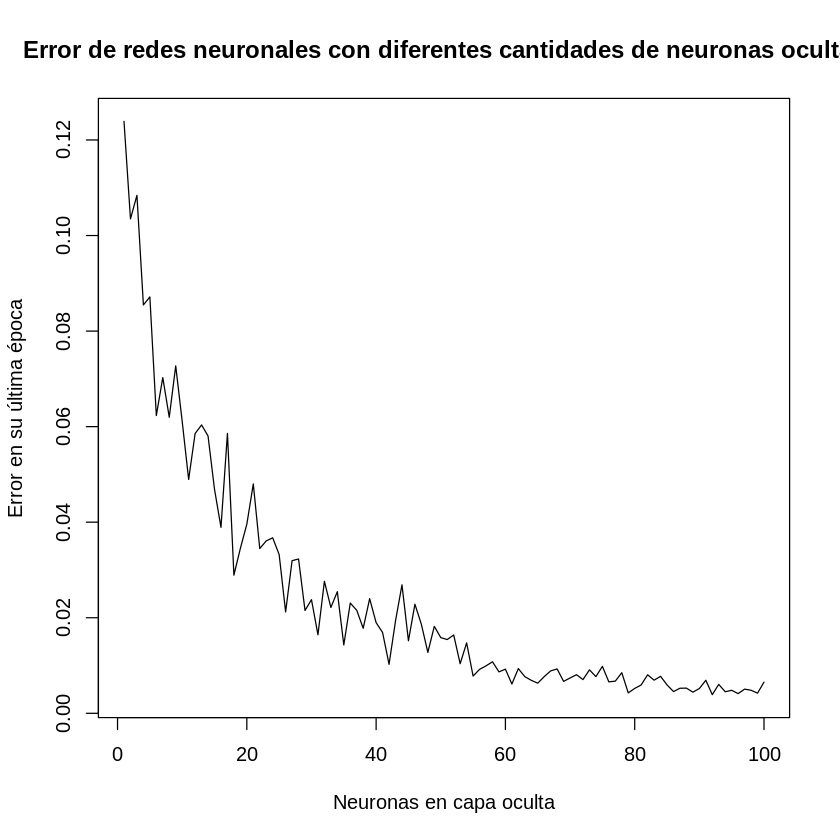

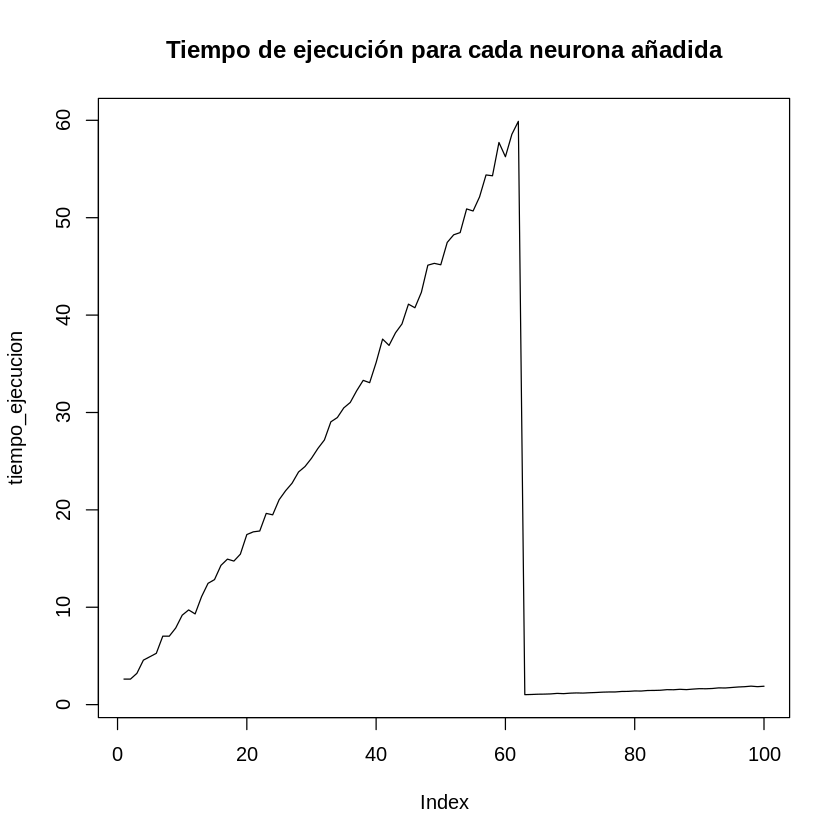

In [ ]:
cat ('Error mínimo = ',min(lin_errores),'\nCantidad de neuronas asociadas al error mínimo = ',which(lin_errores == min(lin_errores)))
plot(lin_errores,type = 'l',xlab ='Neuronas en capa oculta',ylab='Error en su última época', main = 'Error de redes neuronales con diferentes cantidades de neuronas ocultas')
plot(tiempo_ejecucion,type = 'l', main='Tiempo de ejecución para cada neurona añadida')

Como vemos que el coste computacional cae en picado a partir de las 60 neuronas más o menos, lo cual no deja de ser interesanto. Así, usamos 92 neuronas para estudiar nuestra red y observar qué learning rate es el óptimo

In [ ]:
lin_red_min_error = which(lin_errores == min(lin_errores))
cat('Con una cantidad de neuronas en la capa oculta de: ', lin_red_min_error,'neuronas', ', ahora simulamos redes con distintos learning rates.')
tiempo_ejecucion_2 <- c()

lin_errores_learning_rate = c()
for (eta in seq(0.1,1,by=0.1)){
    start.time <- Sys.time()
    a =  red_neuronal_1_capa_oculta(learning_rate = eta, n_h = lin_red_min_error, x = lin_x, y = lin_y, inicializacion = c(-1,1), epocas_por_defecto = 10000)
    lin_errores_learning_rate = c(lin_errores_learning_rate, a$error)
    end.time <- Sys.time()
    tiempo_ejecucion_2 <- c(tiempo_ejecucion_2, end.time - start.time)
}


Con una cantidad de neuronas en la capa oculta de:  92 neuronas , ahora simulamos redes con distintos learning rates.

El learning rate óptimo es:  1 
Error =  0.002839907

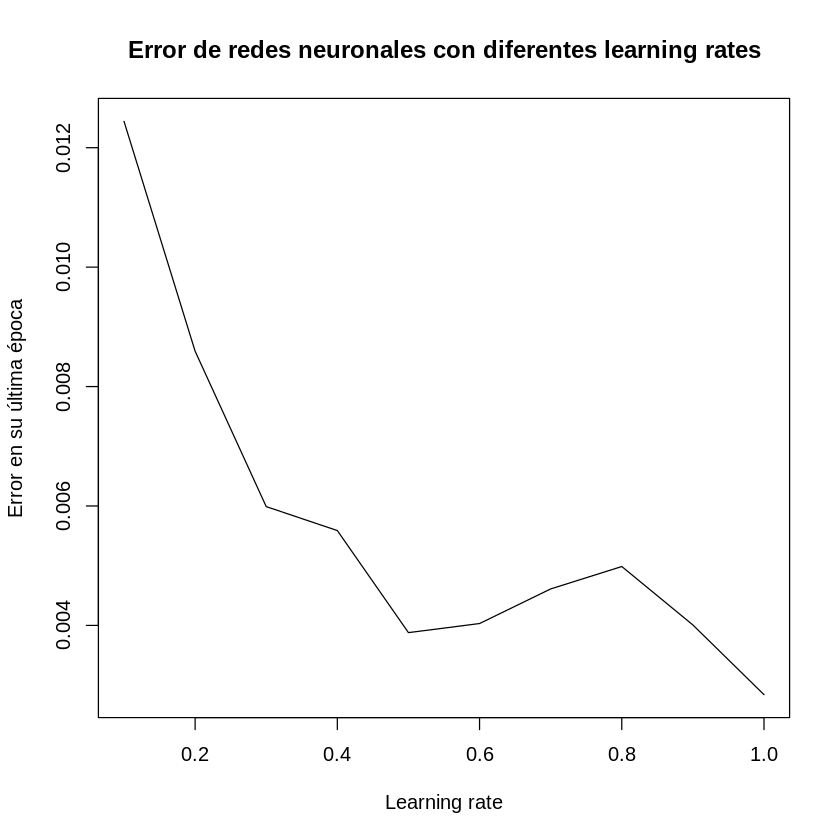

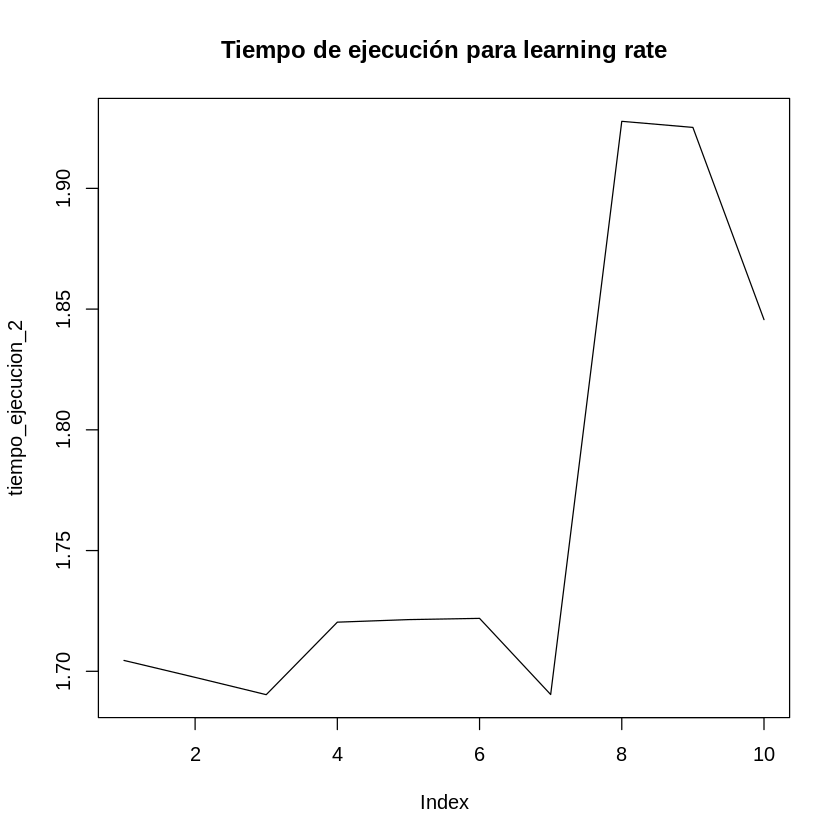

In [ ]:
lin_eta_optimo <- seq(0.1,1,by=0.1)[which(lin_errores_learning_rate == min(lin_errores_learning_rate))]
plot(seq(0.1,1,by=0.1),lin_errores_learning_rate,type = 'l',xlab ='Learning rate',ylab='Error en su última época', main = 'Error de redes neuronales con diferentes learning rates')
cat('El learning rate óptimo es: ', lin_eta_optimo, '\nError = ',min(lin_errores_learning_rate))
plot(tiempo_ejecucion_2,type = 'l', main='Tiempo de ejecución para learning rate')

[1] 0.00376781

y,predicción
0,0.00049
1,0.81734
0,0.06029
1,0.93721
0,0.00373
1,0.96562
1,0.95723
0,0.00001
0,0.23481
1,0.98173


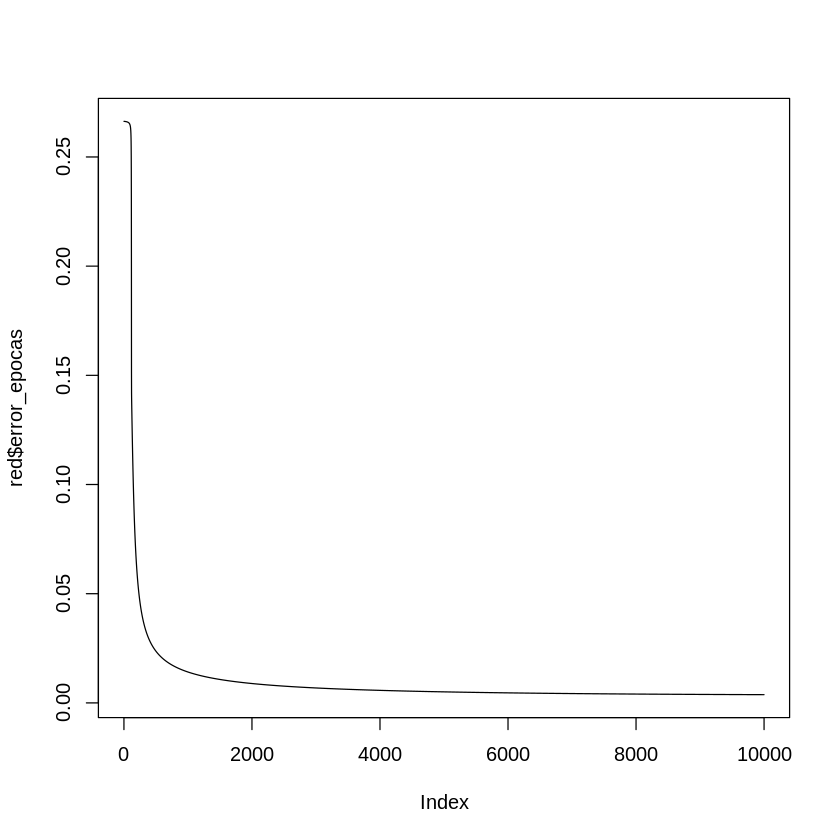

In [ ]:
red <- red_neuronal_1_capa_oculta(learning_rate = lin_eta_optimo, n_h = lin_red_min_error, x = lin_x, y = lin_y, inicializacion = c(-1,1), epocas_por_defecto = 10000)
red$error
red$prediccion
plot(red$error_epocas, type = 'l')

In [ ]:
#Ahora probamos con los datos circle.csv
circ_errores = c()
tiempo_ejecucion <- c()

for (neuronas in seq(1,100)){
    start.time <- Sys.time()
    a =  red_neuronal_1_capa_oculta(learning_rate = 0.5, n_h = neuronas, x = circ_x, y = circ_y, inicializacion = c(-1,1), epocas_por_defecto = 10000)
    circ_errores = c(circ_errores,a$error)
    end.time <- Sys.time()
    tiempo_ejecucion <- c(tiempo_ejecucion, end.time - start.time)
}


Error mínimo =  0.05185113 
Cantidad de neuronas asociadas al error mínimo =  98

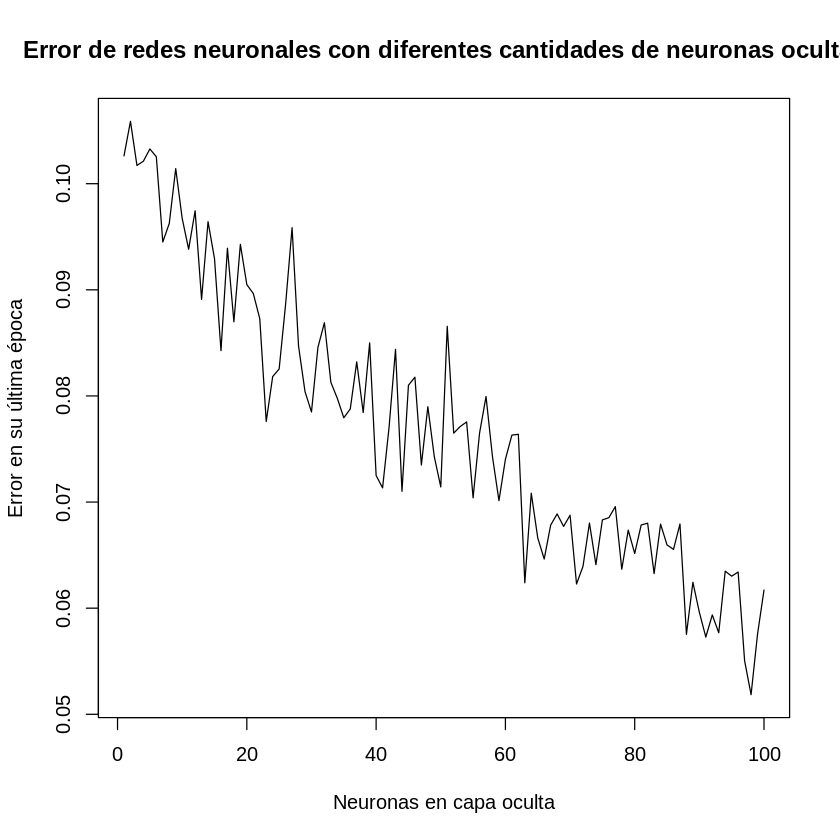

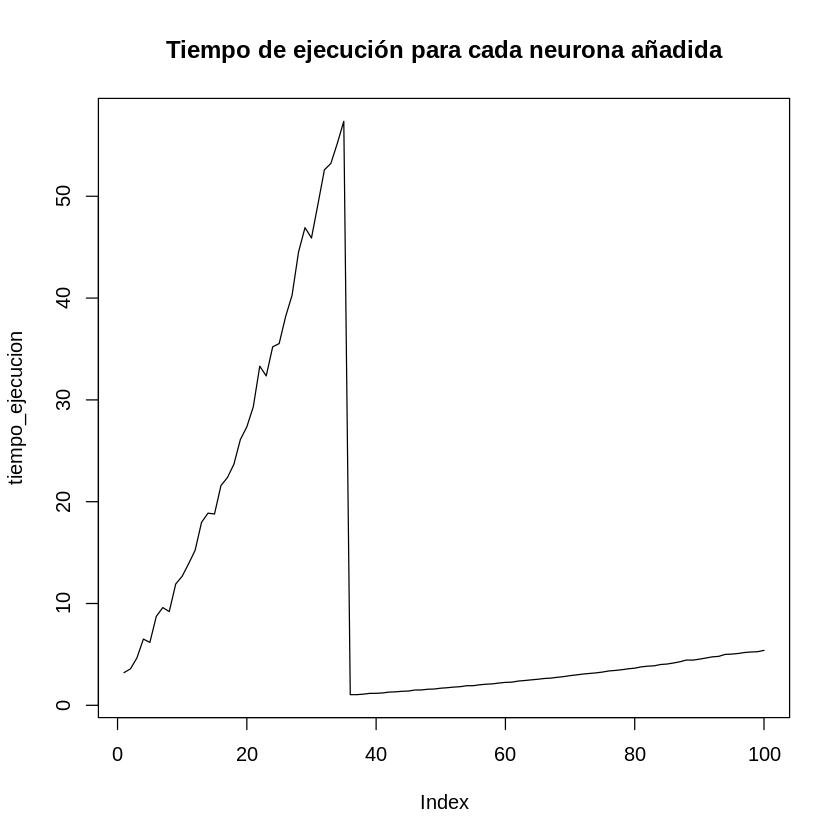

In [ ]:
cat ('Error mínimo = ',min(circ_errores),'\nCantidad de neuronas asociadas al error mínimo = ',which(circ_errores == min(circ_errores)))
plot(circ_errores,type = 'l',xlab ='Neuronas en capa oculta',ylab='Error en su última época', main = 'Error de redes neuronales con diferentes cantidades de neuronas ocultas')
plot(tiempo_ejecucion,type = 'l', main='Tiempo de ejecución para cada neurona añadida')

Vemos que el error no es muy bajo,usando de referencia la red sin capas ocultas (la regresión). Además se observa que el decrecimiento del error a medida que se aumentan neuronas no se estabiliza todavía. Como a medida que se añaden neuronas el error cae, se plantea probar una red de 200 neuronas para determinar el learning rate. Además, observando los datos de lineal.csv, a más neuronas menos error, como el tiempo de computación se hace cada vez mayor a medida que aumentamos las neuronas, lo dejamos en 200 neuronas.

In [20]:
circ_errores_learning_rate = c()
tiempo_ejecucion <- c()
for (eta in seq(0.1,1,by=0.1)){
    start.time <- Sys.time()
    a =  red_neuronal_1_capa_oculta(learning_rate = eta, n_h = 200, x = circ_x, y = circ_y, inicializacion = c(-1,1), epocas_por_defecto = 10000) #inicializaciones
    circ_errores_learning_rate = c(circ_errores_learning_rate,a$error)
    end.time <- Sys.time()
    tiempo_ejecucion <- c(tiempo_ejecucion, end.time - start.time)
}

El learning rate óptimo es:  0.5 
Error medio con learning rate óptimo:  0.04073292

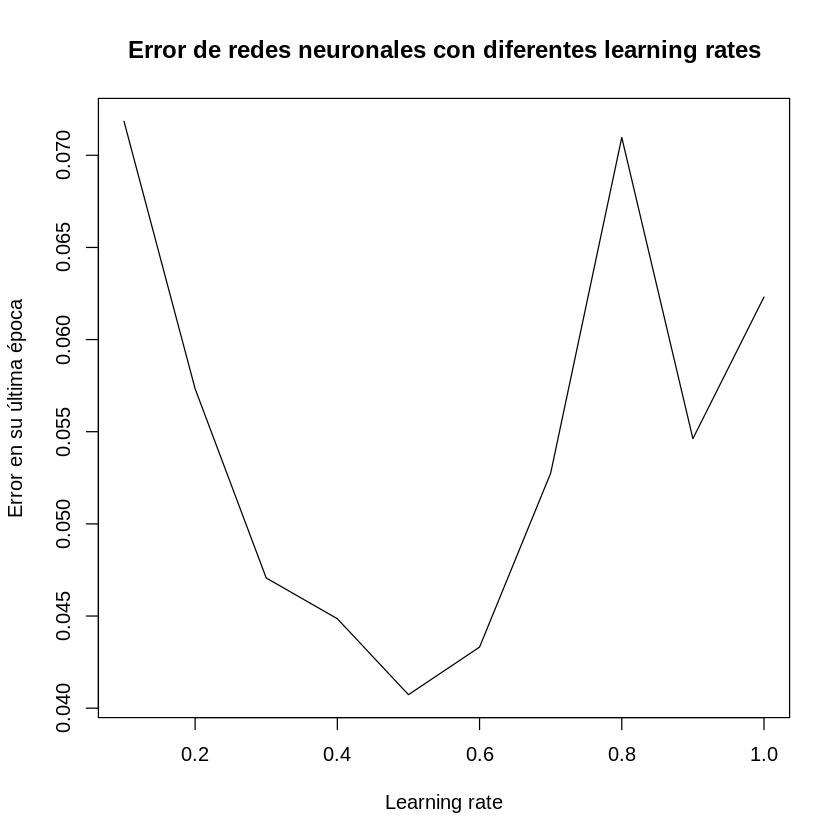

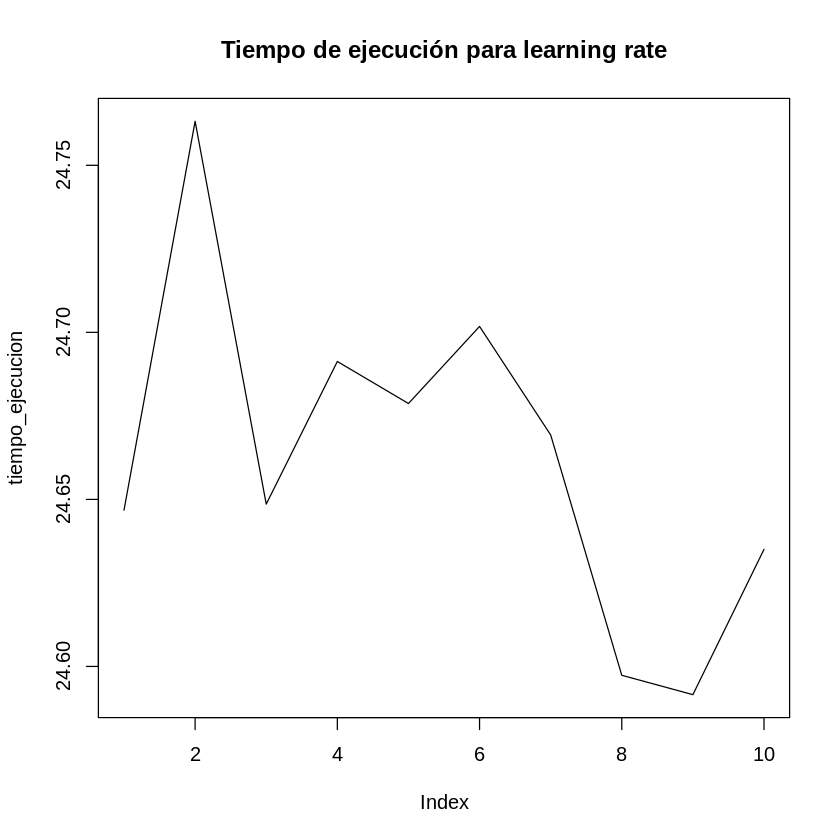

In [22]:
circ_eta_optimo <- seq(0.1,1,by=0.1)[which(circ_errores_learning_rate == min(circ_errores_learning_rate))]
plot(seq(0.1,1,by=0.1),circ_errores_learning_rate,type = 'l',xlab ='Learning rate',ylab='Error en su última época', main = 'Error de redes neuronales con diferentes learning rates')
cat('El learning rate óptimo es: ', circ_eta_optimo, '\nError medio con learning rate óptimo: ', min(circ_errores_learning_rate))

plot(tiempo_ejecucion,type = 'l', main='Tiempo de ejecución para learning rate')

Vemos que el Learning rate óptimo es de 0.5 al tener el error más bajo. Ahora simulamos la red con los parámetro óptimos (200 neuronas y learning rate de 0.5)

In [4]:
a =  red_neuronal_1_capa_oculta(learning_rate = 0.5, n_h = 200, x = circ_x, y = circ_y, inicializacion = c(-1,1), epocas_por_defecto = 10000)

y,predicción
0,0.05638
0,0.05417
1,0.73928
0,0.10888
0,0.13730
0,0.00725
0,0.21470
0,0.02126
0,0.22140
0,0.14399


Error medio última época:  0.03663677

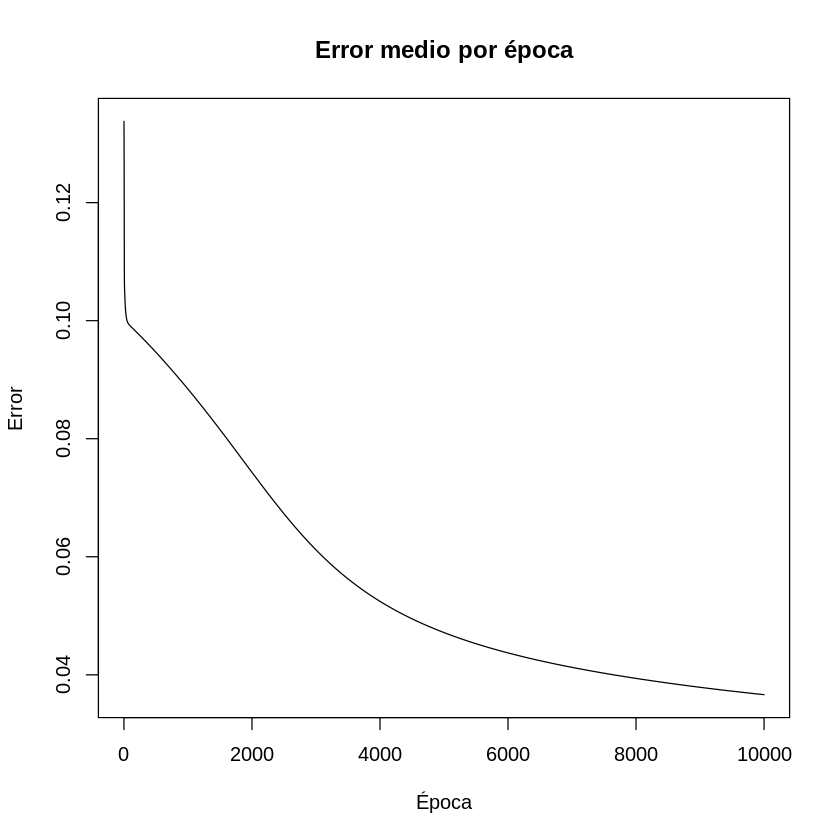

In [19]:
plot(a$error_epocas,type = 'l', main = 'Error medio por época',ylab = 'Error', xlab = 'Época')
head(a$prediccion, 20)

cat('Error medio última época: ',a$error)


Se plantea ahora la red neuronal con efecto inercia. Se pueden observar comentarios en el código.

In [25]:
red_neuronal_1_capa_oculta_efecto_inercia <- function(learning_rate, n_h, x, y, inicializacion, error_min=0.001,epocas_por_defecto = 1000000, alfa){ #Añadimos un parámetro que es el momento del efecto inercia
    in_neur <- ncol(x) 
    min = inicializacion[1]
    max = inicializacion[2]
    pesos_totales <- func_pesos_totales(n_h = n_h, in_out_neur = 4,min = min, max = max) 
    error_total <- 1
    numero_epocas <- 0
    error_total_epocas <- c()
    while (error_total >= error_min){
        numero_epocas <- numero_epocas + 1
        if (numero_epocas == epocas_por_defecto){
            break
        }else{
            desviaciones_capa_2_t_anterior <- rep(0,n_h) #Primero incluimos vectores vacíos ya que en la primera época no hay efecto inercia
            desviaciones_capa_1_t_anterior <- rep(0,n_h * 3)
            reg_1 <- func_reg_1(n_h = n_h, in_neur = in_neur, pesos_totales = pesos_totales, x = x)

      
            output_neur_h <- matrix(data = 0, ncol = n_h, nrow = nrow(x))
            for (i in 1:ncol(reg_1)){
                output_neur_h[,i] = sigmoide(reg_1[,i])
            }

            reg_2 <- func_reg_2(n_h = n_h, in_neur = in_neur, pesos_totales = pesos_totales, output_neur_h = output_neur_h)

            output <- sigmoide(reg_2)
            error_total <- error.total(y, output)
            error_total_epocas <- c(error_total_epocas, error_total)
            ##############################Backpropagation
            ###############Desviaciones segunda capa

        
            dE_dout = der_error.total_sigmoide(y,output)
            
            dout_din = der_sigmoide(reg_2)
            pesos_capa_2 = pesos_totales[(n_h * in_neur + 1):length(pesos_totales)]

            desviaciones_capa_2 <- c()
            for (i in 1:length(pesos_capa_2)){
                desv = dE_dout * dout_din * output_neur_h[,i]
                desviaciones_capa_2 = c(desviaciones_capa_2, mean(desv))
            }

            ##Actualizamos los pesos de la capa 2    
            pesos_totales[which(pesos_totales == pesos_capa_2)] = pesos_capa_2 + learning_rate * desviaciones_capa_2 + alfa * desviaciones_capa_2_t_anterior ###########incluímos el EFECTO INERCIA

            ##Actualizamos las desviaciones del EFECTO INERCIA, para que ya sean de la época anterior
            desviaciones_capa_2_t_anterior = desviaciones_capa_2

            ###############Desviaciones primera capa                    
            dE_dout2 = matrix(data = 0, ncol = n_h, nrow = nrow(x))
            for (i in 1:n_h){
    
                dE_dout2_i = dE_dout * dout_din * output_neur_h[,i]
        
                dout_din2_i = der_sigmoide(reg_1)
                dE_dout2[,i] = dE_dout2_i * dout_din2_i[,i] 
            }

            cant.pesos_1capa = n_h * in_neur 
            vector = seq(1, cant.pesos_1capa, by=in_neur)
            desviaciones_capa_1 <- matrix(data = 0, ncol = cant.pesos_1capa,nrow = nrow(x))

            lista_matrices_desv <- list()
            for (i in 1:length(vector)){

                pesos_1capa_h_i = pesos_totales[vector[i]:min(vector[i] + 2,length(pesos_totales))] 

                desv_hi = matrix(data = 0, ncol = length(pesos_1capa_h_i), nrow = nrow(x))

                for (j in 1:length(pesos_1capa_h_i)){
                    desv = dE_dout2[,i] * output_neur_h[,i]  
                    desv_hi[,j] = desv
                }
          
                lista_matrices_desv <- append(lista_matrices_desv, list(desv_hi))
            }
            desviaciones_capa_1_matrix <- do.call(cbind, lista_matrices_desv)

            desviaciones_capa_1 <- c()
            for (i in 1:ncol(desviaciones_capa_1_matrix)){
                desviaciones_capa_1 = c(desviaciones_capa_1, mean(desviaciones_capa_1_matrix[,i]))
            }
            ##Actualizamos los pesos de la capa 1    
            pesos_totales[1:cant.pesos_1capa] = pesos_totales[1:cant.pesos_1capa] + learning_rate * desviaciones_capa_1 + alfa * desviaciones_capa_1_t_anterior #incluímos el EFECTO INERCIA
            ##Actualizamos las desviaciones del efecto inercia, para que ya sean de la época anterior
            desviaciones_capa_1_t_anterior = desviaciones_capa_1
        }
    }
    result = matrix(c(y, round(output, digits = 5)), ncol = 2)
    colnames(result) <- c('y', 'predicción')
    return(list('error'=error_total, 'epocas'=numero_epocas,'prediccion' = result, 'error_epocas' = error_total_epocas))

}

In [26]:
a_inercia =  red_neuronal_1_capa_oculta_efecto_inercia(learning_rate = 0.5, n_h = 200, x = circ_x, y = circ_y, inicializacion = c(-1,1), epocas_por_defecto = 10000, alfa = 1)

Error medio última época:  0.03987301

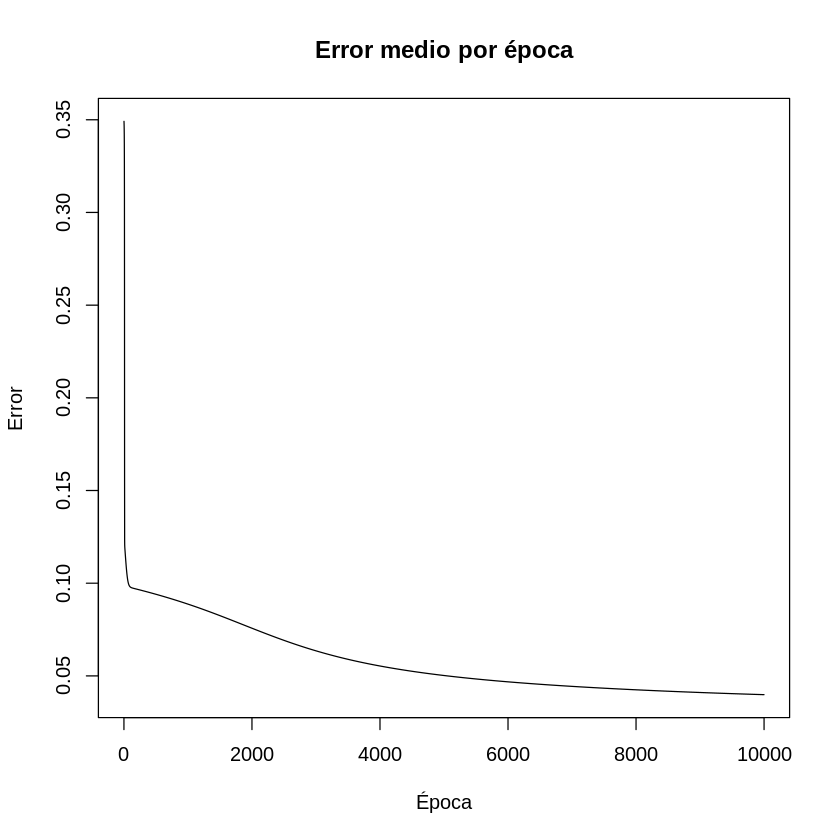

In [29]:
plot(a_inercia$error_epocas,type = 'l', main = 'Error medio por época',ylab = 'Error', xlab = 'Época')

cat('Error medio última época: ',a$error)


Como podemos ver, gracias al efecto inercia, el error desciende mucho de manera muy rápida en las primera épocas. Si bien posteriormente él error ya decrece más paulatinamente, este parámetro intercial nos permite comparar redes en sus primeras épocas que, aunque no estén completas, su coste computacional es más bajo. Vamos a probar a simular distintas redes de manera más rápida: